In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_excel('/content/diabetes dataset.xlsx')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**EDA**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Splitting the data**

In [ ]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split (x, y, test_size = 0.25, random_state=1)

In [ ]:
df.shape

(768, 9)

In [ ]:
xtrain.shape

(576, 8)

In [ ]:
xtest.shape

(192, 8)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [ ]:
confusion_matrix(ytest,ypred)

array([[109,  14],
       [ 29,  40]])

<Axes: >

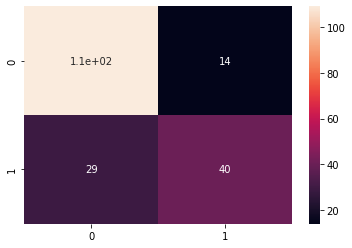

In [ ]:
sns.heatmap(confusion_matrix (ytest,ypred), annot=True)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192





*   Here we are concerned about inc. the possibility of predicting positive as positive, so we concentrate more in increasing the recall value
*   Recall = TP/TP+FN => Total perc of how much positive values is my model able to predict correctly out of total postive cases  





In [ ]:
#compare the prediction of the model

print(ytest[:25].values)
print(ypred[:25])

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


In [ ]:
#Selecting the probability of record being class 1

proba = lg.predict_proba(xtest)
proba                             #now this is showing probabity of y being in class 0 and prob of y being in class 1  [P(0),P(1)] while default threshold being 0.5 
                                  # so we are concerned only about inc. the values in class 1, so lets take only that 

array([[0.5782672 , 0.4217328 ],
       [0.6767115 , 0.3232885 ],
       [0.84994822, 0.15005178],
       [0.95110289, 0.04889711],
       [0.79044472, 0.20955528],
       [0.71895071, 0.28104929],
       [0.62547503, 0.37452497],
       [0.89725634, 0.10274366],
       [0.84148183, 0.15851817],
       [0.79090089, 0.20909911],
       [0.54892079, 0.45107921],
       [0.93274542, 0.06725458],
       [0.01945343, 0.98054657],
       [0.25027011, 0.74972989],
       [0.98022517, 0.01977483],
       [0.24623295, 0.75376705],
       [0.77154685, 0.22845315],
       [0.6920933 , 0.3079067 ],
       [0.87740001, 0.12259999],
       [0.8480037 , 0.1519963 ],
       [0.63444403, 0.36555597],
       [0.87841075, 0.12158925],
       [0.03816317, 0.96183683],
       [0.7228717 , 0.2771283 ],
       [0.93212758, 0.06787242],
       [0.5721997 , 0.4278003 ],
       [0.79474141, 0.20525859],
       [0.24268508, 0.75731492],
       [0.9231833 , 0.0768167 ],
       [0.53025834, 0.46974166],
       [0.

In [ ]:
proba = lg.predict_proba(xtest)[:,1]
proba                            #we are concerned only about inc. the values in class 1, so lets take only that 
              

array([0.4217328 , 0.3232885 , 0.15005178, 0.04889711, 0.20955528,
       0.28104929, 0.37452497, 0.10274366, 0.15851817, 0.20909911,
       0.45107921, 0.06725458, 0.98054657, 0.74972989, 0.01977483,
       0.75376705, 0.22845315, 0.3079067 , 0.12259999, 0.1519963 ,
       0.36555597, 0.12158925, 0.96183683, 0.2771283 , 0.06787242,
       0.4278003 , 0.20525859, 0.75731492, 0.0768167 , 0.46974166,
       0.42413725, 0.3137944 , 0.04986548, 0.73280767, 0.11742741,
       0.66978246, 0.08166012, 0.17557198, 0.10353507, 0.65045733,
       0.20310679, 0.08144875, 0.03505921, 0.26464544, 0.06521571,
       0.02157585, 0.77109856, 0.8386167 , 0.0725095 , 0.14504631,
       0.00718948, 0.1689787 , 0.85413656, 0.04828944, 0.75858953,
       0.09710262, 0.62763758, 0.28955357, 0.55007303, 0.16648024,
       0.64110906, 0.01108764, 0.73746225, 0.22444581, 0.36928545,
       0.11040759, 0.01275063, 0.34764719, 0.74073984, 0.61696853,
       0.89992515, 0.77452392, 0.59715654, 0.0155661 , 0.70489

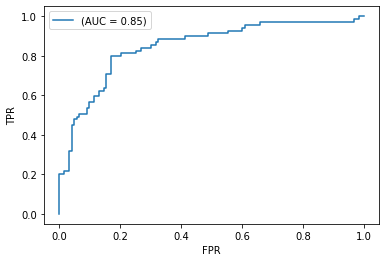

In [ ]:
#plot the roc auc curve for prediction and probabilities

auc = roc_auc_score(ytest,proba)
fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

**Select the best threshold value**

In [ ]:
#threshold values

threshold

array([1.98054657, 0.98054657, 0.8386167 , 0.77452392, 0.77109856,
       0.76622077, 0.74972989, 0.74073984, 0.698085  , 0.69359937,
       0.68366119, 0.67491274, 0.66978246, 0.65819883, 0.6563533 ,
       0.64110906, 0.61696853, 0.61441676, 0.60297466, 0.55007303,
       0.48421804, 0.47031123, 0.45494672, 0.4278003 , 0.42413725,
       0.4217328 , 0.37797103, 0.37452497, 0.34764719, 0.33169356,
       0.3265893 , 0.3137944 , 0.31145155, 0.3079067 , 0.29660231,
       0.28900487, 0.28570704, 0.28104929, 0.2771283 , 0.27131316,
       0.26464544, 0.23153465, 0.22845315, 0.20288036, 0.19984221,
       0.15588674, 0.15384935, 0.14693485, 0.14504631, 0.13942852,
       0.13299454, 0.12162543, 0.12158925, 0.01977483, 0.01750139,
       0.01290743, 0.01275063, 0.00718948])

In [ ]:
accuracy = []

for i in threshold:
  ypred = np.where(proba>i,1,0)    #store each value of threshold in i,if probability > threshold, predict y as 1 otherwise 0
  accuracy.append(accuracy_score(ytest,ypred))                 #store the accuracy of each threshold value

In [ ]:
accuracy

[0.640625,
 0.640625,
 0.7083333333333334,
 0.7083333333333334,
 0.703125,
 0.703125,
 0.7291666666666666,
 0.734375,
 0.7708333333333334,
 0.7760416666666666,
 0.7760416666666666,
 0.78125,
 0.7760416666666666,
 0.78125,
 0.7760416666666666,
 0.7708333333333334,
 0.7708333333333334,
 0.7760416666666666,
 0.7760416666666666,
 0.7760416666666666,
 0.7760416666666666,
 0.7760416666666666,
 0.7760416666666666,
 0.7760416666666666,
 0.7708333333333334,
 0.7760416666666666,
 0.7916666666666666,
 0.7916666666666666,
 0.8125,
 0.8020833333333334,
 0.796875,
 0.7760416666666666,
 0.7708333333333334,
 0.7708333333333334,
 0.765625,
 0.7552083333333334,
 0.75,
 0.75,
 0.7447916666666666,
 0.75,
 0.7447916666666666,
 0.6979166666666666,
 0.6927083333333334,
 0.65625,
 0.6510416666666666,
 0.6197916666666666,
 0.6145833333333334,
 0.59375,
 0.5885416666666666,
 0.59375,
 0.5885416666666666,
 0.5677083333333334,
 0.5625,
 0.375,
 0.3697916666666667,
 0.3697916666666667,
 0.3645833333333333,
 0.3645

In [ ]:
#Now to display threshold and accuracy together
#theshold is in form of array, accuracy is in form of list

threshold_selection = pd.concat([pd.Series(threshold), pd.Series(accuracy)], axis =1)
threshold_selection.head()

,0,1
0,1.980547,0.640625
1,0.980547,0.640625
2,0.838617,0.708333
3,0.774524,0.708333
4,0.771099,0.703125


In [ ]:
#to incorprate column names

threshold_selection.columns = ('Threshold', 'Accuracy')
threshold_selection.head()

,Threshold,Accuracy
0,1.980547,0.640625
1,0.980547,0.640625
2,0.838617,0.708333
3,0.774524,0.708333
4,0.771099,0.703125


In [ ]:
#To sort by accuracy and see the threshold that has the highes accuracy
threshold_selection.sort_values(by = 'Accuracy', ascending = False).head()

,Threshold,Accuracy
28,0.347647,0.812500
29,0.331694,0.802083
30,0.326589,0.796875
27,0.374525,0.791667
26,0.377971,0.791667


In [ ]:
# so now i want to tell my model that i want to change my threshold as 0.347 since it has the highest accuracy

from sklearn.preprocessing import binarize

final_ypred = binarize([proba], threshold = 0.347647)[0]        #[0] to convet to 1D array


In [ ]:
#Check the accuracy of the model with selected threshold
print(classification_report(ytest,final_ypred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       123
           1       0.72      0.78      0.75        69

    accuracy                           0.81       192
   macro avg       0.80      0.81      0.80       192
weighted avg       0.82      0.81      0.81       192



In [ ]:
# Accuracy has increased, recall has gone down, presicion has gone up

In [ ]:
confusion_matrix(ytest,final_ypred)


array([[102,  21],
       [ 15,  54]])

In [ ]:
# False Negetive was 24, it has become 15 now